In [258]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Visualisations of Results

# 1. Accuracy Results

In [262]:
# Function for extracting accuracy results

def accuracy_results():
    # Define the base directory path where the Excel files are located
    directory_path = '../../data/accuracy_results/'

    # Define the subdirectories for different models
    models = ['BASELINE', 'GRU', 'LSTM', 'SARIMA', 'TBATS']

    # Define the data locations for NRMSE and NMAE in each forecast category
    data_locations = {
        '14 days':
            {'NRMSE': {'14 Days Training': (3, 'B:K'), 'Training:Testing = 75:25': (3, 'R:AA'), 'Training:Testing = 50:50': (3, 'AH:AQ')},
            'NMAE': {'14 Days Training': (4, 'B:K'), 'Training:Testing = 75:25': (4, 'R:AA'), 'Training:Testing = 50:50': (4, 'AH:AQ')}},
        '7 days':
            {'NRMSE': {'14 Days Training': (8, 'B:K'), 'Training:Testing = 75:25': (8, 'R:AA'), 'Training:Testing = 50:50': (8, 'AH:AQ')},
            'NMAE': {'14 Days Training': (9, 'B:K'), 'Training:Testing = 75:25': (9, 'R:AA'), 'Training:Testing = 50:50': (9, 'AH:AQ')}},
        '3 days':
            {'NRMSE': {'14 Days Training': (13, 'B:K'), 'Training:Testing = 75:25': (13, 'R:AA'), 'Training:Testing = 50:50': (13, 'AH:AQ')},
            'NMAE': {'14 Days Training': (14, 'B:K'), 'Training:Testing = 75:25': (14, 'R:AA'), 'Training:Testing = 50:50': (14, 'AH:AQ')}},
        '1 day':
            {'NRMSE': {'14 Days Training': (18, 'B:K'), 'Training:Testing = 75:25': (18, 'R:AA'), 'Training:Testing = 50:50': (18, 'AH:AQ')},
            'NMAE': {'14 Days Training': (19, 'B:K'), 'Training:Testing = 75:25': (19, 'R:AA'), 'Training:Testing = 50:50': (19, 'AH:AQ')}},
    }

    # Initialize a list to hold the combined NRMSE and NMAE data
    combined_data = []

    # Iterate over each training method directory
    for model in models:
        # Construct the full path to the model directory
        model_path = os.path.join(directory_path, model)
        
        # List all Excel files in the directory
        excel_files = [f for f in os.listdir(model_path) if f.endswith('.xlsx')]
        
        # Iterate over each Excel file
        for file in excel_files:
            # Construct the full file path
            file_path = os.path.join(model_path, file)
            
            # Iterate over each forecast category to extract NRMSE and NMAE data
            for forecast_period, metrics in data_locations.items():
                for metric, training_methods in metrics.items():
                    for training_method, (row, columns) in training_methods.items():
                        try:
                            # Load the Excel file data for the specified range
                            df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                            # Flatten the data and add it to the combined data list
                            values = df.values.flatten().tolist()
                            combined_data.extend([(model, forecast_period, metric, training_method, value) for value in values])
                        except Exception as e:
                            print(f"Error reading {file_path} for forecast period {forecast_period}, metric {metric}: {e}")

    # Convert the combined data list to a DataFrame
    combined_df = pd.DataFrame(combined_data, columns=['Model', 'Forecast Period', 'Metric', 'Training Method', 'Value'])
    return combined_df

In [263]:
# Extract accuracy results
combined_df_accuracy = accuracy_results()

## Filter dataset for forecast period and training method so that the measurements are not impacted by outliers
combined_df_accuracy_filtered = combined_df_accuracy[combined_df_accuracy['Value'] < 5]

## Plot 1: Accuracy Distribution of Demand Models

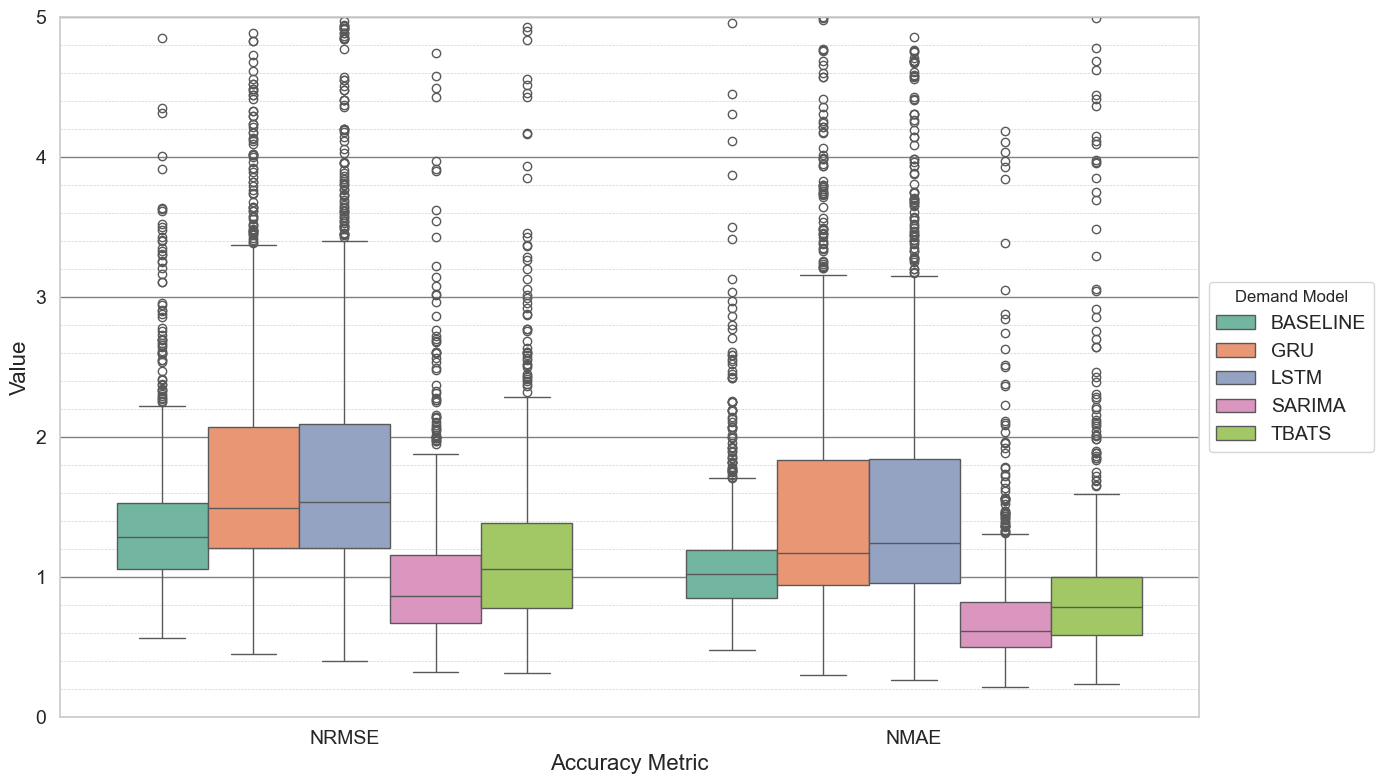

In [277]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(data=combined_df_accuracy_filtered, x='Metric', y='Value', hue='Model',  palette='Set2')

# Setting up y-axis scale
ax.set_ylim(0, 5)

# Enabling minor ticks
ax.minorticks_on()

# Setting up grid lines
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Accuracy Metric', fontsize=16)
ax.set_ylabel('Value', fontsize=16)

# Setting the x-tick labels horizontally and ensuring they match the unique metric names
ax.set_xticks(range(len(combined_df_accuracy_filtered['Metric'].unique())))
ax.set_xticklabels(combined_df_accuracy_filtered['Metric'].unique(), rotation=0, fontsize=14)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

# Creating the box plot
plt.legend(title='Demand Model', bbox_to_anchor=(1, 0.5), loc='center left', fontsize=14)
plt.tight_layout()

# Check if the target directory exists
target_dir = '../../visualisations/summary'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/summary/overall_demand_models_accuracy.svg'
plt.savefig(plot_path)

plot_path = '../../visualisations/summary/overall_demand_models_accuracy.png'
plt.savefig(plot_path)



## Plot 2: Accuracy Distribution of Training Methods

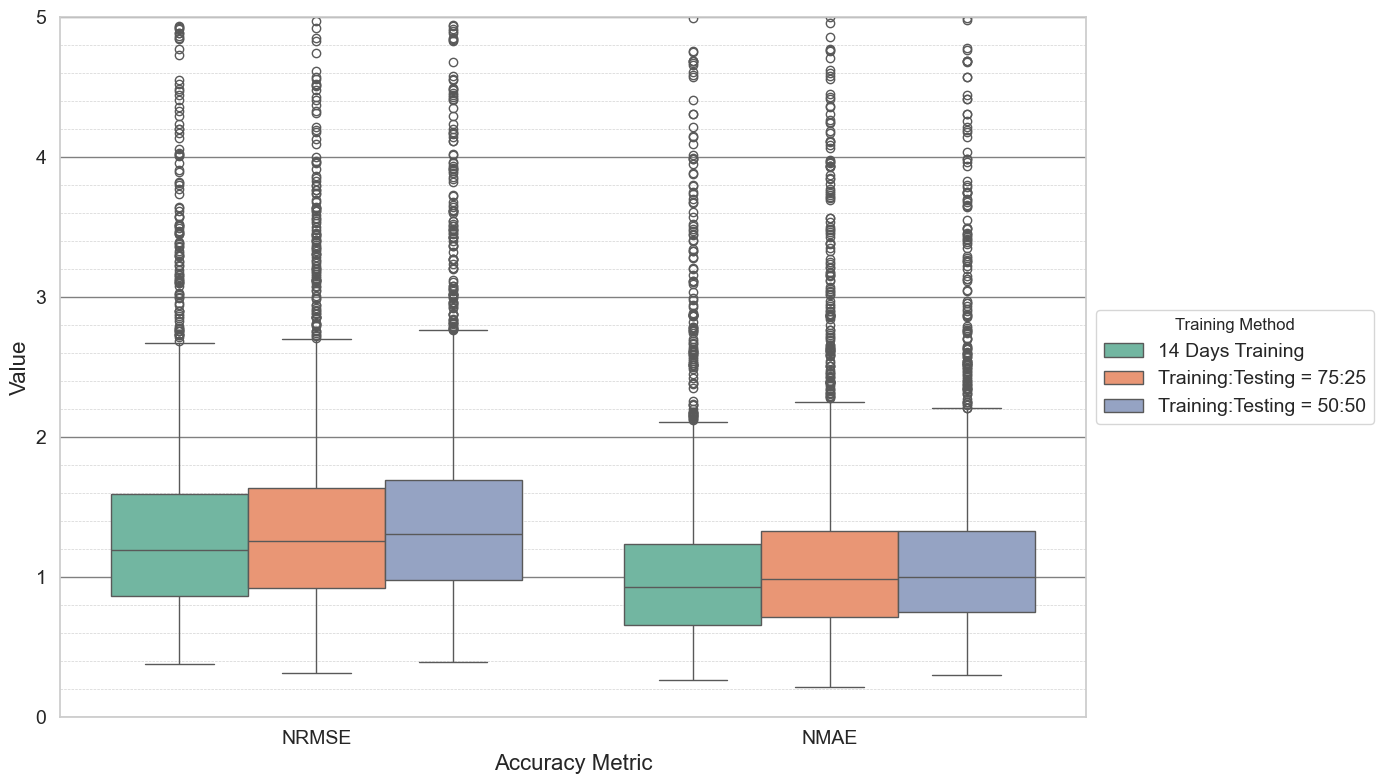

In [278]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(data=combined_df_accuracy_filtered, x='Metric', y='Value', hue='Training Method',  palette='Set2')

# Setting up y-axis scale
ax.set_ylim(0, 5)

# Enabling minor ticks
ax.minorticks_on()

# Setting up grid lines
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Accuracy Metric', fontsize=16)
ax.set_ylabel('Value', fontsize=16)

# Setting the x-tick labels horizontally and ensuring they match the unique metric names
metrics_unique = combined_df_accuracy_filtered['Metric'].unique()
ax.set_xticks(range(len(metrics_unique)))
ax.set_xticklabels(metrics_unique, rotation=0, fontsize=14)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

# Creating the box plot
plt.legend(title='Training Method', bbox_to_anchor=(1, 0.5), loc='center left', fontsize=14)
plt.tight_layout() 

# Check if the target directory exists
target_dir = '../../visualisations/summary'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/summary/overall_training_methods_accuracy.svg'
plt.savefig(plot_path)

plot_path = '../../visualisations/summary/overall_training_methods_accuracy.png'
plt.savefig(plot_path)


## Plot 3: Accuracy Distribution of Forecast Periods

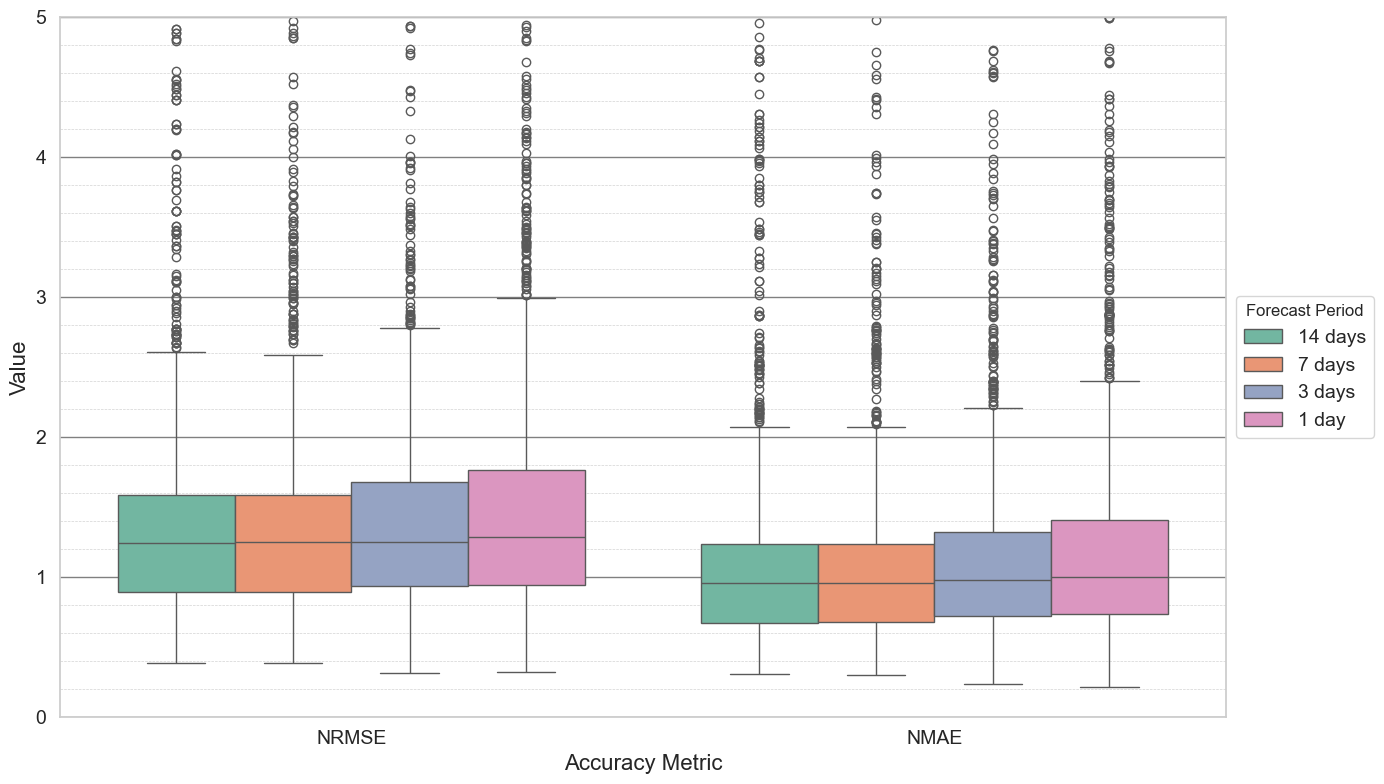

In [267]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(data=combined_df_accuracy_filtered, x='Metric', y='Value', hue='Forecast Period', palette='Set2')

# Setting up y-axis scale
ax.set_ylim(0, 5)

# Enabling minor ticks
ax.minorticks_on()

# Setting up grid lines
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Accuracy Metric', fontsize=16)
ax.set_ylabel('Value', fontsize=16)

# Setting the x-tick labels horizontally and ensuring they match the unique metric names
ax.set_xticks(range(len(combined_df_accuracy_filtered['Metric'].unique())))
ax.set_xticklabels(combined_df_accuracy_filtered['Metric'].unique(), rotation=0, fontsize=14)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

# Creating the box plot
plt.legend(title='Forecast Period', bbox_to_anchor=(1, 0.5), loc='center left', fontsize=14)
plt.tight_layout()

# Creating the box plot
plt.tight_layout()

# Check if the target directory exists
target_dir = '../../visualisations/summary'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/summary/overall_forecast_periods_accuracy.svg'
plt.savefig(plot_path)

# 2. Execution Time Results

In [268]:
# Function for extracting execution time results

def execution_time_results():
    # Define the base directory path where the Excel files are located
    directory_path = '../../data/execution_time_results/'

    # Define the subdirectories for different models
    models = ['BASELINE', 'GRU', 'LSTM', 'SARIMA', 'TBATS']

    # Define the data locations for execution time values in each forecast category
    data_locations = {
        '14 days':
            {'Time (s)': {'14 Days Training': (3, 'B:K'), 'Training:Testing = 75:25': (3, 'R:AA'), 'Training:Testing = 50:50': (3, 'AH:AQ')}},
        '7 days':
            {'Time (s)': {'14 Days Training': (7, 'B:K'), 'Training:Testing = 75:25': (7, 'R:AA'), 'Training:Testing = 50:50': (7, 'AH:AQ')}},
        '3 days':
            {'Time (s)': {'14 Days Training': (11, 'B:K'), 'Training:Testing = 75:25': (11, 'R:AA'), 'Training:Testing = 50:50': (11, 'AH:AQ')}},
        '1 day':
            {'Time (s)': {'14 Days Training': (15, 'B:K'), 'Training:Testing = 75:25': (15, 'R:AA'), 'Training:Testing = 50:50': (15, 'AH:AQ')}},
    }

    # Initialize a list to hold the combined execution time data
    combined_data = []

    # Iterate over each training method directory
    for model in models:
        # Construct the full path to the model directory
        model_path = os.path.join(directory_path, model)
        
        # List all Excel files in the directory
        excel_files = [f for f in os.listdir(model_path) if f.endswith('.xlsx')]
        
        # Iterate over each Excel file
        for file in excel_files:
            # Construct the full file path
            file_path = os.path.join(model_path, file)
            
            # Iterate over each forecast category to extract execution time data
            for forecast_period, metrics in data_locations.items():
                for metric, training_methods in metrics.items():
                    for training_method, (row, columns) in training_methods.items():
                        try:
                            # Load the Excel file data for the specified range
                            df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                            # Flatten the data and add it to the combined data list
                            values = df.values.flatten().tolist()
                            combined_data.extend([(model, forecast_period, metric, training_method, value) for value in values])
                        except Exception as e:
                            print(f"Error reading {file_path} for forecast period {forecast_period}, metric {metric}: {e}")

    # Convert the combined data list to a DataFrame
    combined_df = pd.DataFrame(combined_data, columns=['Model', 'Forecast Period', 'Metric', 'Training Method', 'Time'])
    return combined_df

In [269]:
# Extract execution time results
combined_df_execution_time = execution_time_results()

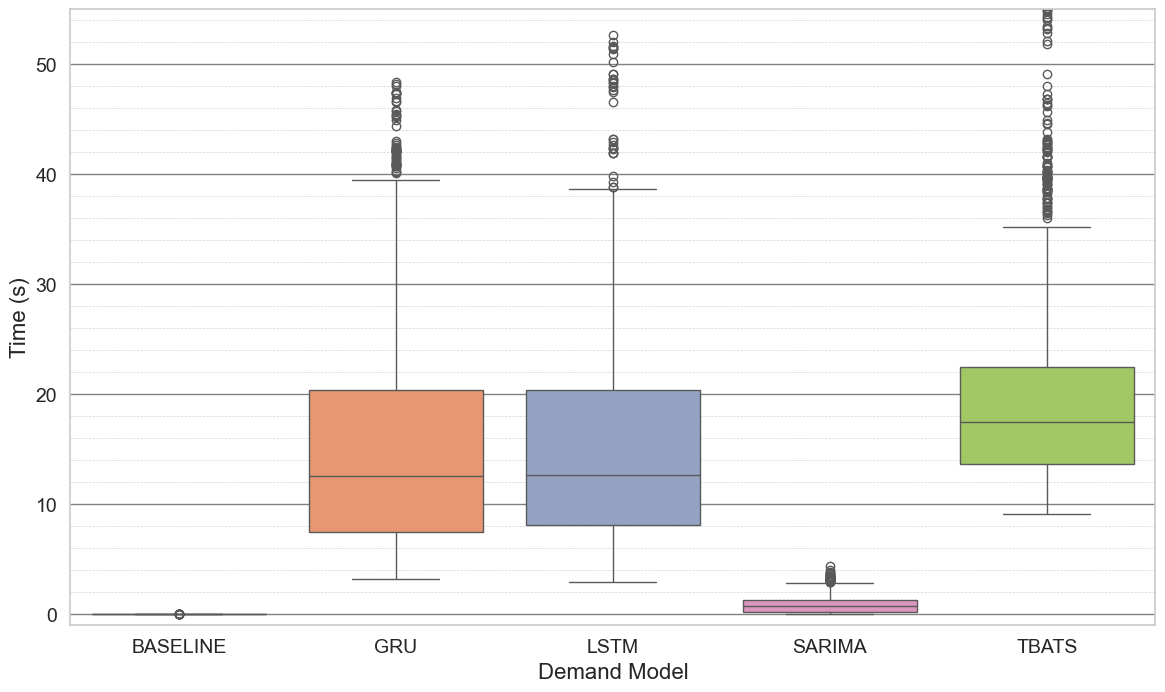

In [279]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(data=combined_df_execution_time, x='Model', y='Time', hue='Model',  palette='Set2')
# Set tighter y-axis scale
ax.set_ylim(-1, 55)

 # Enabling minor ticks and setting up grid lines
ax.minorticks_on()
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Demand Model', fontsize=16)
ax.set_ylabel('Time (s)', fontsize=16)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)


# Check if the target directory exists
target_dir = '../../visualisations/summary'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/summary/overall_execution_time.svg'
plt.savefig(plot_path)

plot_path = '../../visualisations/summary/overall_execution_time.png'
plt.savefig(plot_path)


# 3. Demand-Proportionality Results

In [ ]:
# Function for extracting demand-proportionality results

def demand_proportionality_results():
    # Construct the full file path
    directory_path = '../../data/demand_proportionality_results/'

    # Define the data locations for demand-proportionality in each forecast category
    data_locations = {
        '28 day':
            {'Pearson Correlation Coefficient': {'Flat Energy': (2, 'B:K'), 'Time of Use': (3, 'B:K'), 'Range': (4, 'B:K'), 'Percentile': (5, 'B:K')}},
        '14 days':
            {'Pearson Correlation Coefficient': {'Flat Energy': (9, 'B:K'), 'Time of Use': (10, 'B:K'), 'Range': (11, 'B:K'), 'Percentile': (12, 'B:K')}},
        '7 days':
            {'Pearson Correlation Coefficient': {'Flat Energy': (16, 'B:K'), 'Time of Use': (17, 'B:K'), 'Range': (18, 'B:K'), 'Percentile': (19, 'B:K')}},
        '3 days':
            {'Pearson Correlation Coefficient': {'Flat Energy': (23, 'B:K'), 'Time of Use': (24, 'B:K'), 'Range': (25, 'B:K'), 'Percentile': (26, 'B:K')}},
        '2 day':
            {'Pearson Correlation Coefficient': {'Flat Energy': (30, 'B:K'), 'Time of Use': (31, 'B:K'), 'Range': (32, 'B:K'), 'Percentile': (33, 'B:K')}},
        '1 day':
            {'Pearson Correlation Coefficient': {'Flat Energy': (37, 'B:K'), 'Time of Use': (38, 'B:K'), 'Range': (39, 'B:K'), 'Percentile': (40, 'B:K')}},
    }

    # Initialize a list to hold the combined demand-proportionality data
    combined_data = []
        
    # List all Excel files in the directory
    excel_files = [f for f in os.listdir(directory_path) if f.endswith('.xlsx')]
    
    # Iterate over each Excel file
    for file in excel_files:
        # Construct the full file path
        file_path = os.path.join(directory_path, file)
        
        # Iterate over each forecast category to extract demand-proportionality data
        for test_period, metrics in data_locations.items():
            for metric, pricing_methods in metrics.items():
                for pricing_method, (row, columns) in pricing_methods.items():
                    try:
                        # Load the Excel file data for the specified range
                        df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                        # Flatten the data and add it to the combined data list
                        values = df.values.flatten().tolist()
                        combined_data.extend([(test_period, metric, pricing_method, value) for value in values])
                    except Exception as e:
                        print(f"Error reading {file_path} for test period {test_period}, pricing method {pricing_method}: {e}")

    # Convert the combined data list to a DataFrame
    combined_df = pd.DataFrame(combined_data, columns=['Test Period', 'Metric', 'Pricing Method', 'Value'])
    return combined_df

In [ ]:
# Extract demand-proportionality results
combined_df_demand_proportionality = demand_proportionality_results()

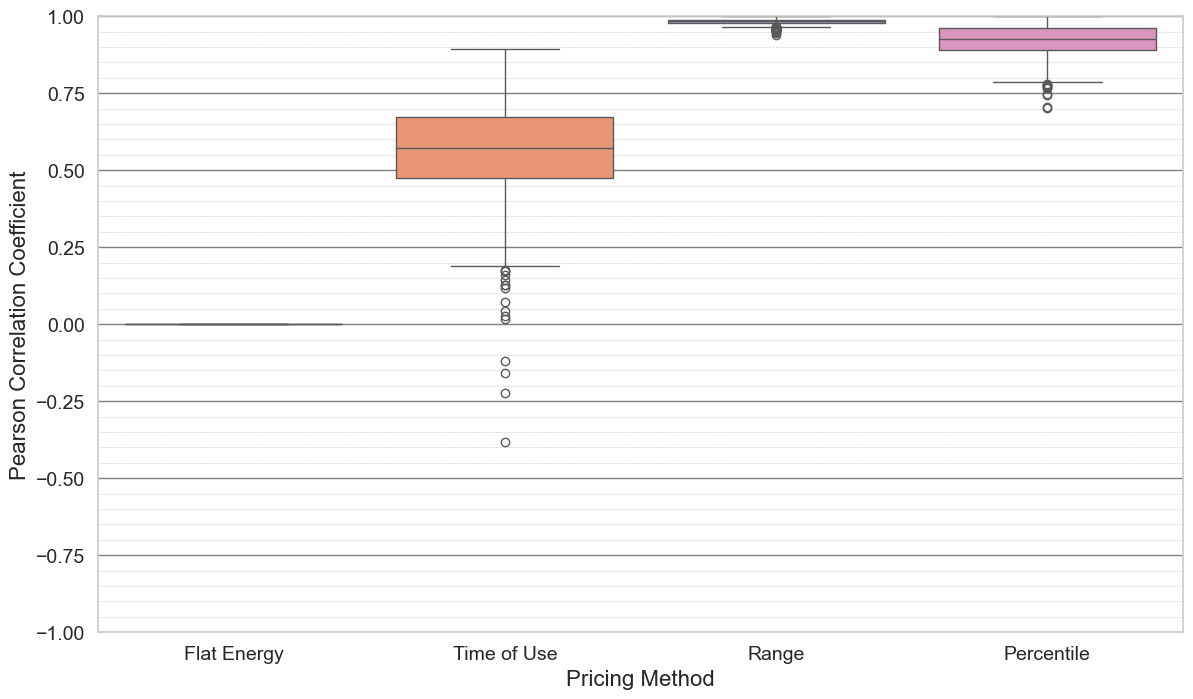

In [280]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(data=combined_df_demand_proportionality, x='Pricing Method', y='Value', hue='Pricing Method',  palette='Set2')
# Set tighter y-axis scale
ax.set_ylim(-1, 1)

 # Enabling minor ticks and setting up grid lines
ax.minorticks_on()
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Pricing Method', fontsize=16)
ax.set_ylabel('Pearson Correlation Coefficient', fontsize=16)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)


# Check if the target directory exists
target_dir = '../../visualisations/summary'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/summary/overall_demand_proportionality.svg'
plt.savefig(plot_path)

plot_path = '../../visualisations/summary/overall_demand_proportionality.png'
plt.savefig(plot_path)



# 4. Revenue Results

In [ ]:
# Function for extracting revenue results

def revenue_results():
    # Construct the full file path
    directory_path = '../../data/revenue_results/'

    # Define the data locations for revenue in each forecast category
    data_locations = {
        '28 day':
            {'Revenue': {'Flat Energy': (2, 'B:K'), 'Time of Use': (3, 'B:K'), 'Range': (4, 'B:K'), 'Percentile': (5, 'B:K')}},
        '14 days':
            {'Revenue': {'Flat Energy': (9, 'B:K'), 'Time of Use': (10, 'B:K'), 'Range': (11, 'B:K'), 'Percentile': (12, 'B:K')}},
        '7 days':
            {'Revenue': {'Flat Energy': (16, 'B:K'), 'Time of Use': (17, 'B:K'), 'Range': (18, 'B:K'), 'Percentile': (19, 'B:K')}},
        '3 days':
            {'Revenue': {'Flat Energy': (23, 'B:K'), 'Time of Use': (24, 'B:K'), 'Range': (25, 'B:K'), 'Percentile': (26, 'B:K')}},
        '2 day':
            {'Revenue': {'Flat Energy': (30, 'B:K'), 'Time of Use': (31, 'B:K'), 'Range': (32, 'B:K'), 'Percentile': (33, 'B:K')}},
        '1 day':
            {'Revenue': {'Flat Energy': (37, 'B:K'), 'Time of Use': (38, 'B:K'), 'Range': (39, 'B:K'), 'Percentile': (40, 'B:K')}},
    }

    # Initialize a list to hold the combined revenue data
    combined_data = []
        
    # List all Excel files in the directory
    excel_files = [f for f in os.listdir(directory_path) if f.endswith('.xlsx')]
    
    # Iterate over each Excel file
    for file in excel_files:
        # Construct the full file path
        file_path = os.path.join(directory_path, file)
        
        # Iterate over each forecast category to extract revenue data
        for test_period, metrics in data_locations.items():
            for metric, pricing_methods in metrics.items():
                for pricing_method, (row, columns) in pricing_methods.items():
                    try:
                        # Load the Excel file data for the specified range
                        df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                        # Flatten the data and add it to the combined data list
                        values = df.values.flatten().tolist()
                        combined_data.extend([(test_period, metric, pricing_method, value) for value in values])
                    except Exception as e:
                        print(f"Error reading {file_path} for test period {test_period}, pricing method {pricing_method}: {e}")

    # Convert the combined data list to a DataFrame
    combined_df = pd.DataFrame(combined_data, columns=['Test Period', 'Metric', 'Pricing Method', 'Value'])
    return combined_df

In [ ]:
# Extract revenue results
combined_df_revenue = revenue_results()

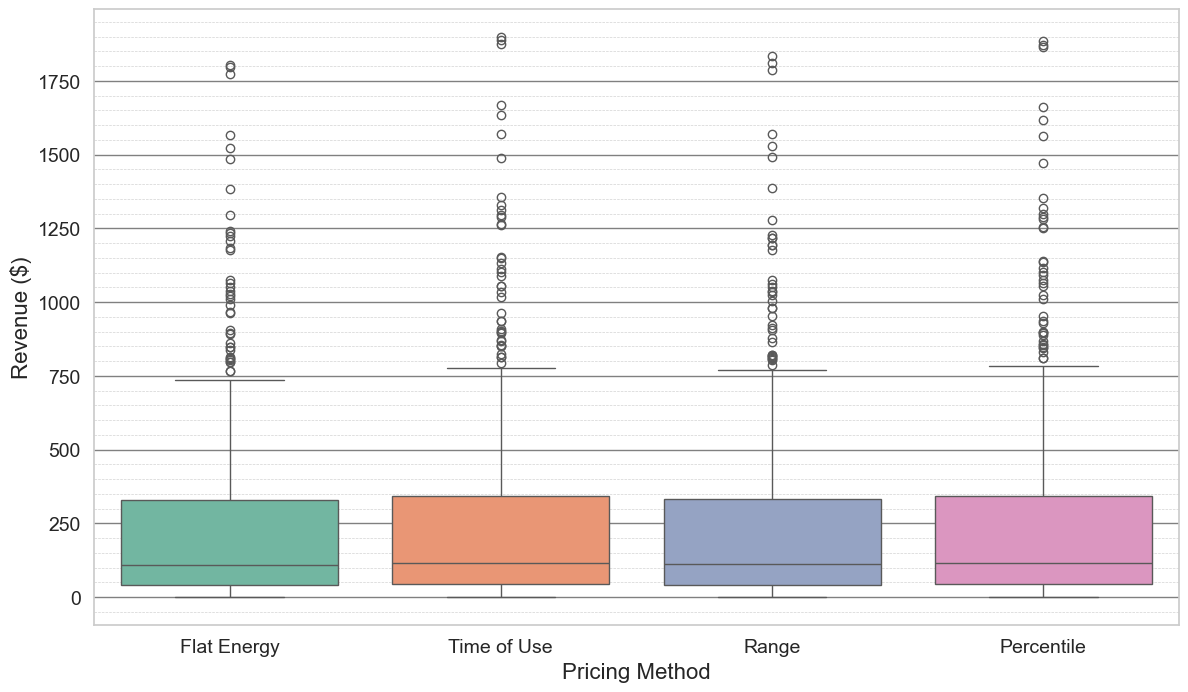

In [281]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(x='Pricing Method', y='Value', hue='Pricing Method', data=combined_df_revenue, palette='Set2', ax=ax, legend=False)

# Enabling minor ticks
ax.minorticks_on()

# Setting up grid lines
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Pricing Method', fontsize=16)
ax.set_ylabel('Revenue ($)', fontsize=16)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

# Check if the target directory exists
target_dir = '../../visualisations/summary'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/summary/overall_revenue.svg'
plt.savefig(plot_path)

plot_path = '../../visualisations/summary/overall_revenue.png'
plt.savefig(plot_path)
